# Assignment 2

### Question 1) 
Read the "earthquake.csv" file as a DataFrame object. 
Each row represents a report sent from someone’s mobile phone indicating an emergency or some other problem. Each has an associated timestamp as "incident date" and a location as "latitude" and "longitude". Print the first 10 records for these 3 columns.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

earthquake = pd.read_csv("earthquake.csv")
earthquake[["INCIDENT DATE","LATITUDE","LONGITUDE"]].head(10)

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


### Question 2)
The CATEGORY field contains a comma-separated list of codes indicating the type of message. Check the rows for missing values in "CATEGORY" column. Show which entries in a dataFrame are missing.

In [3]:
missings = pd.isnull(earthquake["CATEGORY"])
earthquake[missings]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
1198,2777,"Food needed in Castro area, near airport 10 De...",24/01/2010 23:31,10 Dessaline Road,hungry grangou. We are in the Cit?? Castro a...,NaN,18.567320,-72.293280,YES,NO
1531,2436,Food Needed in Fontamara 27,22/01/2010 23:04,Fontamara 27 (off Rue National 2) Coordinates ...,NOU NAN FONTAMARA 27 PROLONGE NOU PA WE PES?N\...,NaN,18.532570,-72.367540,YES,NO
1828,2130,"15 People, 5 Babies, Water and Food Needed at ...",23/01/2010 18:07,Airport Runway Entrance - one end of the runwa...,nou sou wout aewopo a antre pis la nou se 15 f...,NaN,18.580320,-72.312390,YES,NO
2620,1182,Trapped person,19/01/2010 05:19,"Delmas, 33 Rue Derrosier Impas Du Crist, Numbe...",Mwen.se MADAM LAINE FRITZ MWEN RETE DELMAS 33 ...,NaN,18.559451,-72.295522,YES,NO
2622,1179,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.431400,-72.787200,YES,NO
2623,1178,500 to 600 people in a temporary shelter with ...,19/01/2010 05:57,"Grand Goave, Haiti",Nou anviron 500 a 600 moun nan abri pwoviswa g...,NaN,18.424764,-72.770300,YES,NO


### Question 3) 

If you notice above in the data summary, some of the categories are missing, so we might want to drop these data points. Additionally, call the describe function to show that there are some aberrant locations.
Clean the bad locations by considering conditions below and remove the missing categories. 

Conditions for location: 
- Latitude should be range of between 18 and 20
- Longitude should be range of between -70 and -75
            

In [4]:
earthquake.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [5]:
earthquake = earthquake.loc[earthquake["LATITUDE"] < 20]
earthquake = earthquake.loc[earthquake["LONGITUDE"] < -70]
earthquake = earthquake.loc[pd.isnull(earthquake["CATEGORY"]) == False]
earthquake.describe()

,Serial,LATITUDE,LONGITUDE
count,3569.000000,3569.000000,3569.000000
mean,2081.498459,18.592503,-72.424994
std,1170.311824,0.273695,0.291018
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524200,-72.417498
50%,2166.000000,18.539269,-72.335000
75%,3089.000000,18.561800,-72.293939
max,4052.000000,19.940630,-71.099489


Now we might want to do some analysis or visualization of this data by category, but each category field may have multiple categories. Additionally, each category is given as a code plus an English and possibly also a French code name. Thus, a little bit of wrangling is required to get the data into a more agreeable form. First, write the functions to get a list of all the categories and to split each category into a code and an English name

In [6]:
def get_list_of_categories():
    categoryList = list(earthquake["CATEGORY"])
    categories_list = []
    for element in categoryList:
        element_list = element.split(", ")
        for category in element_list:
            if category not in categories_list:
                categories_list.append(category)
    categories_list.sort()
    categories_list.pop(0)
    return categories_list

def get_english(category):
    category.split(":")
    category_list = []
    arr = category.split(". ")
    code = arr[0]
    name = arr[1]
    fra_eng = name.split(" | ")
    if len(fra_eng) == 1:
        eng = fra_eng[0]
    elif len(fra_eng) == 2:
        eng = fra_eng[1]
    category_list.append(code)
    category_list.append(eng)
    return tuple(category_list)

You can better understand how to write a function by looking at the result obtained from the **_get english_** function below.

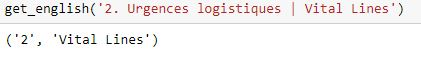

In [7]:
categories = get_list_of_categories()
for category in categories:
    english = get_english(category)
    print(english)

('1', 'Emergency')
('1a', 'Highly vulnerable')
('1b', 'Medical Emergency')
('1c', 'People trapped')
('1d', 'Fire')
('2', 'Vital Lines')
('2a', 'Food Shortage')
('2b', 'Water shortage')
('2c', 'Contaminated water')
('2c', 'Security Concern')
('2d', 'Shelter needed')
('2e', 'Fuel shortage')
('2f', 'Power Outage')
('3', 'Public Health')
('3a', 'Infectious human disease')
('3b', 'Chronic care needs')
('3c', 'Medical equipment and supply needs')
('3d', "OBGYN/Women's Health")
('3e', 'Psychiatric need')
('4', 'Security Threats')
('4a', 'Looting')
('4c', 'Group violence')
('4e', 'Water sanitation and hygiene promotion')
('5', 'Infrastructure Damage')
('5a', 'Collapsed structure')
('5b', 'Unstable Structure')
('5c', 'Road blocked')
('5d', 'Compromised bridge')
('5e', 'Communication lines down')
('6', 'Natural Hazards')
('6a', 'Deaths')
('6b', 'Missing Persons')
('6c', 'Asking to forward a message')
('6c', 'Earthquake and aftershocks')
('7', 'Services Available')
('7a', 'Food distribution point

### Question 4)

Write a function to make a dict mapping code to name for "CATEGORY" column.

In [8]:
def mapping():
    english_dict = {}
    categories = get_list_of_categories()
    for category in categories:
        eng = get_english(category)
        english_dict[eng[0]] = eng[1]
    return english_dict
english_mapping = mapping()

english_mapping['2c']

'Security Concern'

You can better understand how to write a function by looking at the result obtained from the **_english_mapping_** below.

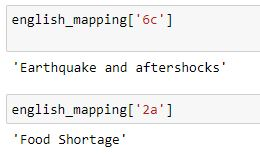

### Question 5) 
Read the "births.csv" file as a DataFrame object. Use a pivot table to understand the data. Add a column called "quinquennial" to analyze male and female total births every five years.

In [9]:
births = pd.read_csv("births.csv")
births_pt = pd.pivot_table(data=births[["year","gender","births"]], index="year", columns="gender",aggfunc="sum")
births_pt

births         
gender        F        M
year                    
1969    1753634  1846572
1970    1819164  1918636
1971    1736774  1826774
1972    1592347  1673888
1973    1533102  1613023
1974    1543005  1627626
1975    1535546  1618010
1976    1547613  1628863
1977    1623363  1708796
1978    1626324  1711976
1979    1705837  1793958
1980    1762459  1855522
1981    1772037  1863478
1982    1797239  1888218
1983    1775299  1867522
1984    1791802  1881766
1985    1834774  1930290
1986    1833708  1926987
1987    1860111  1953105
1988    1909210  2004583
1989    1973712  2071981
1990    2030966  2131951
1991    2011601  2103741
1992    1985118  2084310
1993    1953456  2051067
1994    1932234  2024691
1995    1904871  1998141
1996    1902664  1992210
1997    1896928  1987401
1998    1927106  2018086
1999    1934510  2028955
2000    1984255  2079568
2001    1970770  2060761
2002    1966519  2060857
2003    1999387  2096705
2004    2010710  2108197
2005    2022892  2122727
2006    2084957  2188268
2007    2111890  2212118
2008    2077929  2177227

In [10]:
qqy = [list(births_pt.index)[i] for i in range(0,len(list(births_pt.index)), 5)]
qqf = []
qqm = []
for x in range(0,len(list(births_pt.index)),5):
    tf = 0
    tm = 0
    for i in range(0,5):
        tf += list(births_pt["births"]["F"])[x+i]
        tm += list(births_pt["births"]["M"])[x+i]
    qqf.append(tf)
    qqm.append(tm)

qq_df = pd.DataFrame({"quinquennial": qqy, "female": qqf, "male":qqm}).set_index("quinquennial")
qq_df

,female,male
quinquennial,,
1969,8435021,8878893
1974,7875851,8295271
1979,8812871,9268698
1984,9229605,9696731
1989,9954853,10443050
1994,9563803,10020529
1999,9855441,10326846
2004,10308378,10808537


### Question 6)
Plot the total number of US births by year and gender to see the annual trend in births by gender. Make your own comment for the graph.

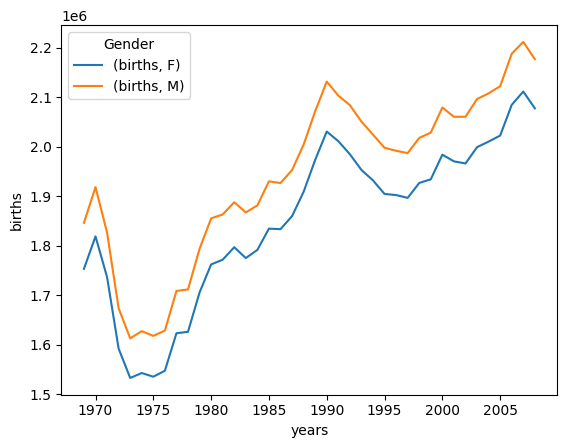

In [11]:
births_pt.plot(xlabel="years", ylabel="births").legend(title="Gender")

### Question 7)
Display the mean of birth values for females and males in the same histogram.

Note: x-axis: mean values, y-axis: year of birth

<AxesSubplot:ylabel='year'>

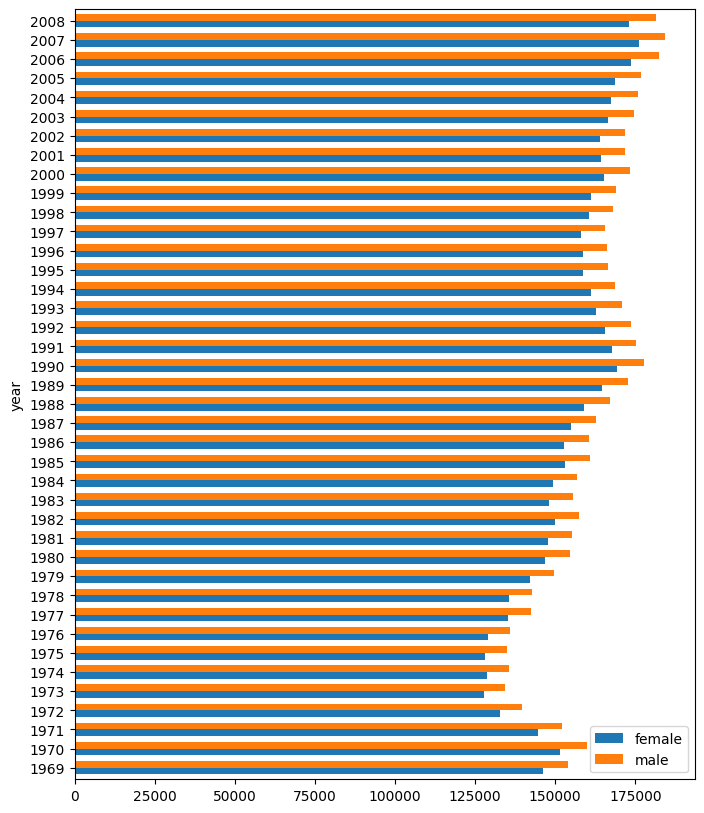

In [12]:
births_df = pd.DataFrame({"year": list(births_pt.index),
                          "female": list(births_pt["births"]["F"]),
                          "male": list(births_pt["births"]["M"])}).set_index("year")
births_df[["female","male"]].apply(lambda x: x / 12, axis=1).plot.barh(width=0.7, figsize=(8,10))

### Question 8)

Read the "tip.csv" file as a DataFrame object. Add a column presents tip percentage of total bill and generate a KDE (Kernel Density Estimate) plot.


In [13]:
tip = pd.read_csv("tip.csv")
tip["tip_percentage"] = [list(tip["tip"])[i]/list(tip["total_bill"])[i]*100 for i in range(tip.shape[0])]
tip

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


<AxesSubplot:ylabel='Density'>

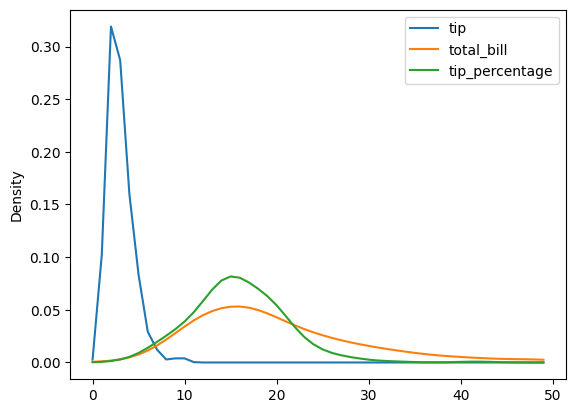

In [14]:
tip[["tip","total_bill","tip_percentage"]].plot(kind="kde", ind=[i for i in range(0,50)])

### Question 9)
Group the tip data by sex and smoker to present mean and standard deviation scores for tip percentage.

In [15]:
gtip = tip.groupby(["sex","smoker"])
gtip[["tip_percentage"]].describe()

tip_percentage                                            \
                       count       mean       std       min        25%   
sex    smoker                                                            
Female No               54.0  15.692097  3.642118  5.679667  13.970835   
       Yes              33.0  18.215035  7.159451  5.643341  15.243902   
Male   No               97.0  16.066872  4.184875  7.180385  13.181019   
       Yes              60.0  15.277118  9.058794  3.563814  10.184496   

                                                
                     50%        75%        max  
sex    smoker                                   
Female No      14.969118  18.162966  25.267250  
       Yes     17.391304  19.821606  41.666667  
Male   No      15.760441  18.621974  29.198966  
       Yes     14.101483  19.169707  71.034483

### Question 10)
Create a stacked bar plot displaying the frequency of data points for each size on each day

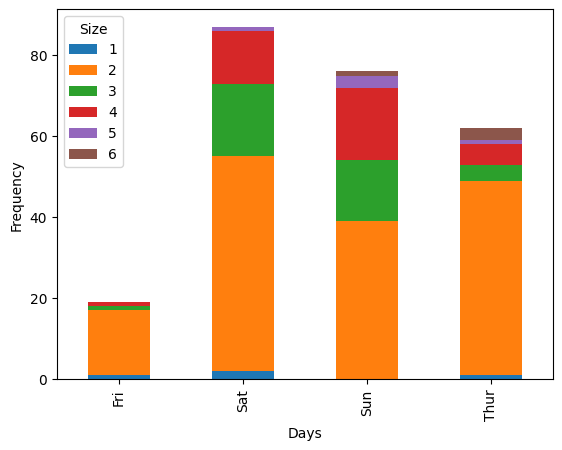

In [19]:
pivott = pd.pivot_table(data=tip, index = "day", columns = "size", aggfunc = "count").fillna(0)
pivott["tip"].plot(kind="bar",stacked=True, xlabel="Days", ylabel="Frequency").legend(loc="upper left", title="Size")

### Question 11)

Create a new stacked bar plot that has normalized values from a graph at Q10 so that each row sums to 1.

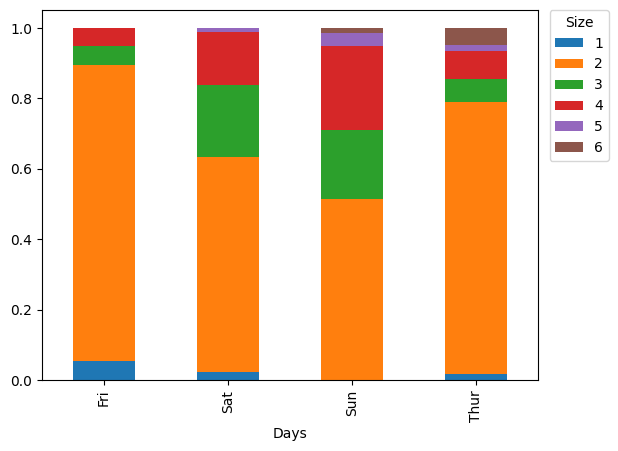

In [16]:
pvt = pivott["tip"].apply(lambda x: x/sum(x), axis=1)
pvt.plot(kind="bar", stacked=True, xlabel="Days").legend(title="Size", bbox_to_anchor=(1.01,1.02))